<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Pràctica 1 - Grafs </h2>
</center>
</p>
</div>

<div class="alert alert-danger" style="width:95%; margin:0 auto; padding">
<center><p><h2> ¡¡IMPORTANTE!! </h2></p> </center> 

<p>
Para la realizacón de esta práctica tendréis que utilizar vuestra propia clase `Graph` implementada en la Práctica 0. Si dicha clase no cumple los requisitos funcionales y no pasa los tests, con muy alta probabilidad los tests propuestos para esta práctica tampoco funcionen correctamente. 
</p>
</div>

<div class="alert alert-info">
<center>
  <h1>Introducción</h1>
</center>


A lo largo de esta práctica trabajaremos con el grafo generado a partir de la red de metro de Londres. En este grafo los nodos representan las estaciones y los ejes las vias que van de una estación a otra. Todos los ejes tienen cuatro atributos:

* Linea
* Color
* Nombre (de la linea)
* Distancia


In [4]:
# TODO: Importar grafo de la Práctica0
from util import get_subway_graph, draw_subway_graph
from graph import Graph

G, lines = get_subway_graph('csv', Graph)
G.edge[1][52]
print(G.edge[1][52])

{'name': 'District Line', 'color': '0d6928', 'stripe': 'NULL', 'line': 4, 'distance': 0.01477328670269583}


Los nodos contienen el nombre de la estación, la latitud y longitud a la que está situada la estación, el número de lineas y la zona.

In [11]:
print("Node:",G.nodes()[0])
print("Veïns:",G.neighbors(11))
print(G.edge[11][83])

Node: 11
Veïns: [83, 212, 163, 104, 249, 28, 94]
{'color': 'f5a6b3', 'line': 6, 'stripe': 'NULL', 'name': 'Hammersmith & City Line'}


In [38]:
print(G.edge[11][163]['name'])
print(G.edge[11][83]['name'])

Bakerloo Line
Hammersmith & City Line


Para mas consultas, la información ha sido extraida de Wikimedia Commons:

https://commons.wikimedia.org/wiki/London_Underground_geographic_maps/CSV

# util.py

En este archivo se os facilitan tres funciones que os permitiran cargar y visualizar la red de metro.
```python
"""
Retorna un objeto nx.Graph que corresponde al grafo de la red de metro y un 
diccionario con las lineas del metro
 - location: ruta donde esta almacenado el archivo .csv
 - Klass: la clase Graph que hemos desarrollado en la práctica 0
"""
G, lines = get_subway_graph(location, Klass)

"""
Dibuja el grafo que le pasemos por parametro.
- G: Grafo de la red de metro
- lines: diccionario con la información sobre las lineas del metro
- figsize: parametro opcional que nos permite definir el tamaño de la figura
- show_labels: parametro opcional que nos permite indicar si queremos mostrar los 
    nombres de las estaciones
"""
draw_metro_graph(G, lines, figsize=(10,6), show_labels=False)

```

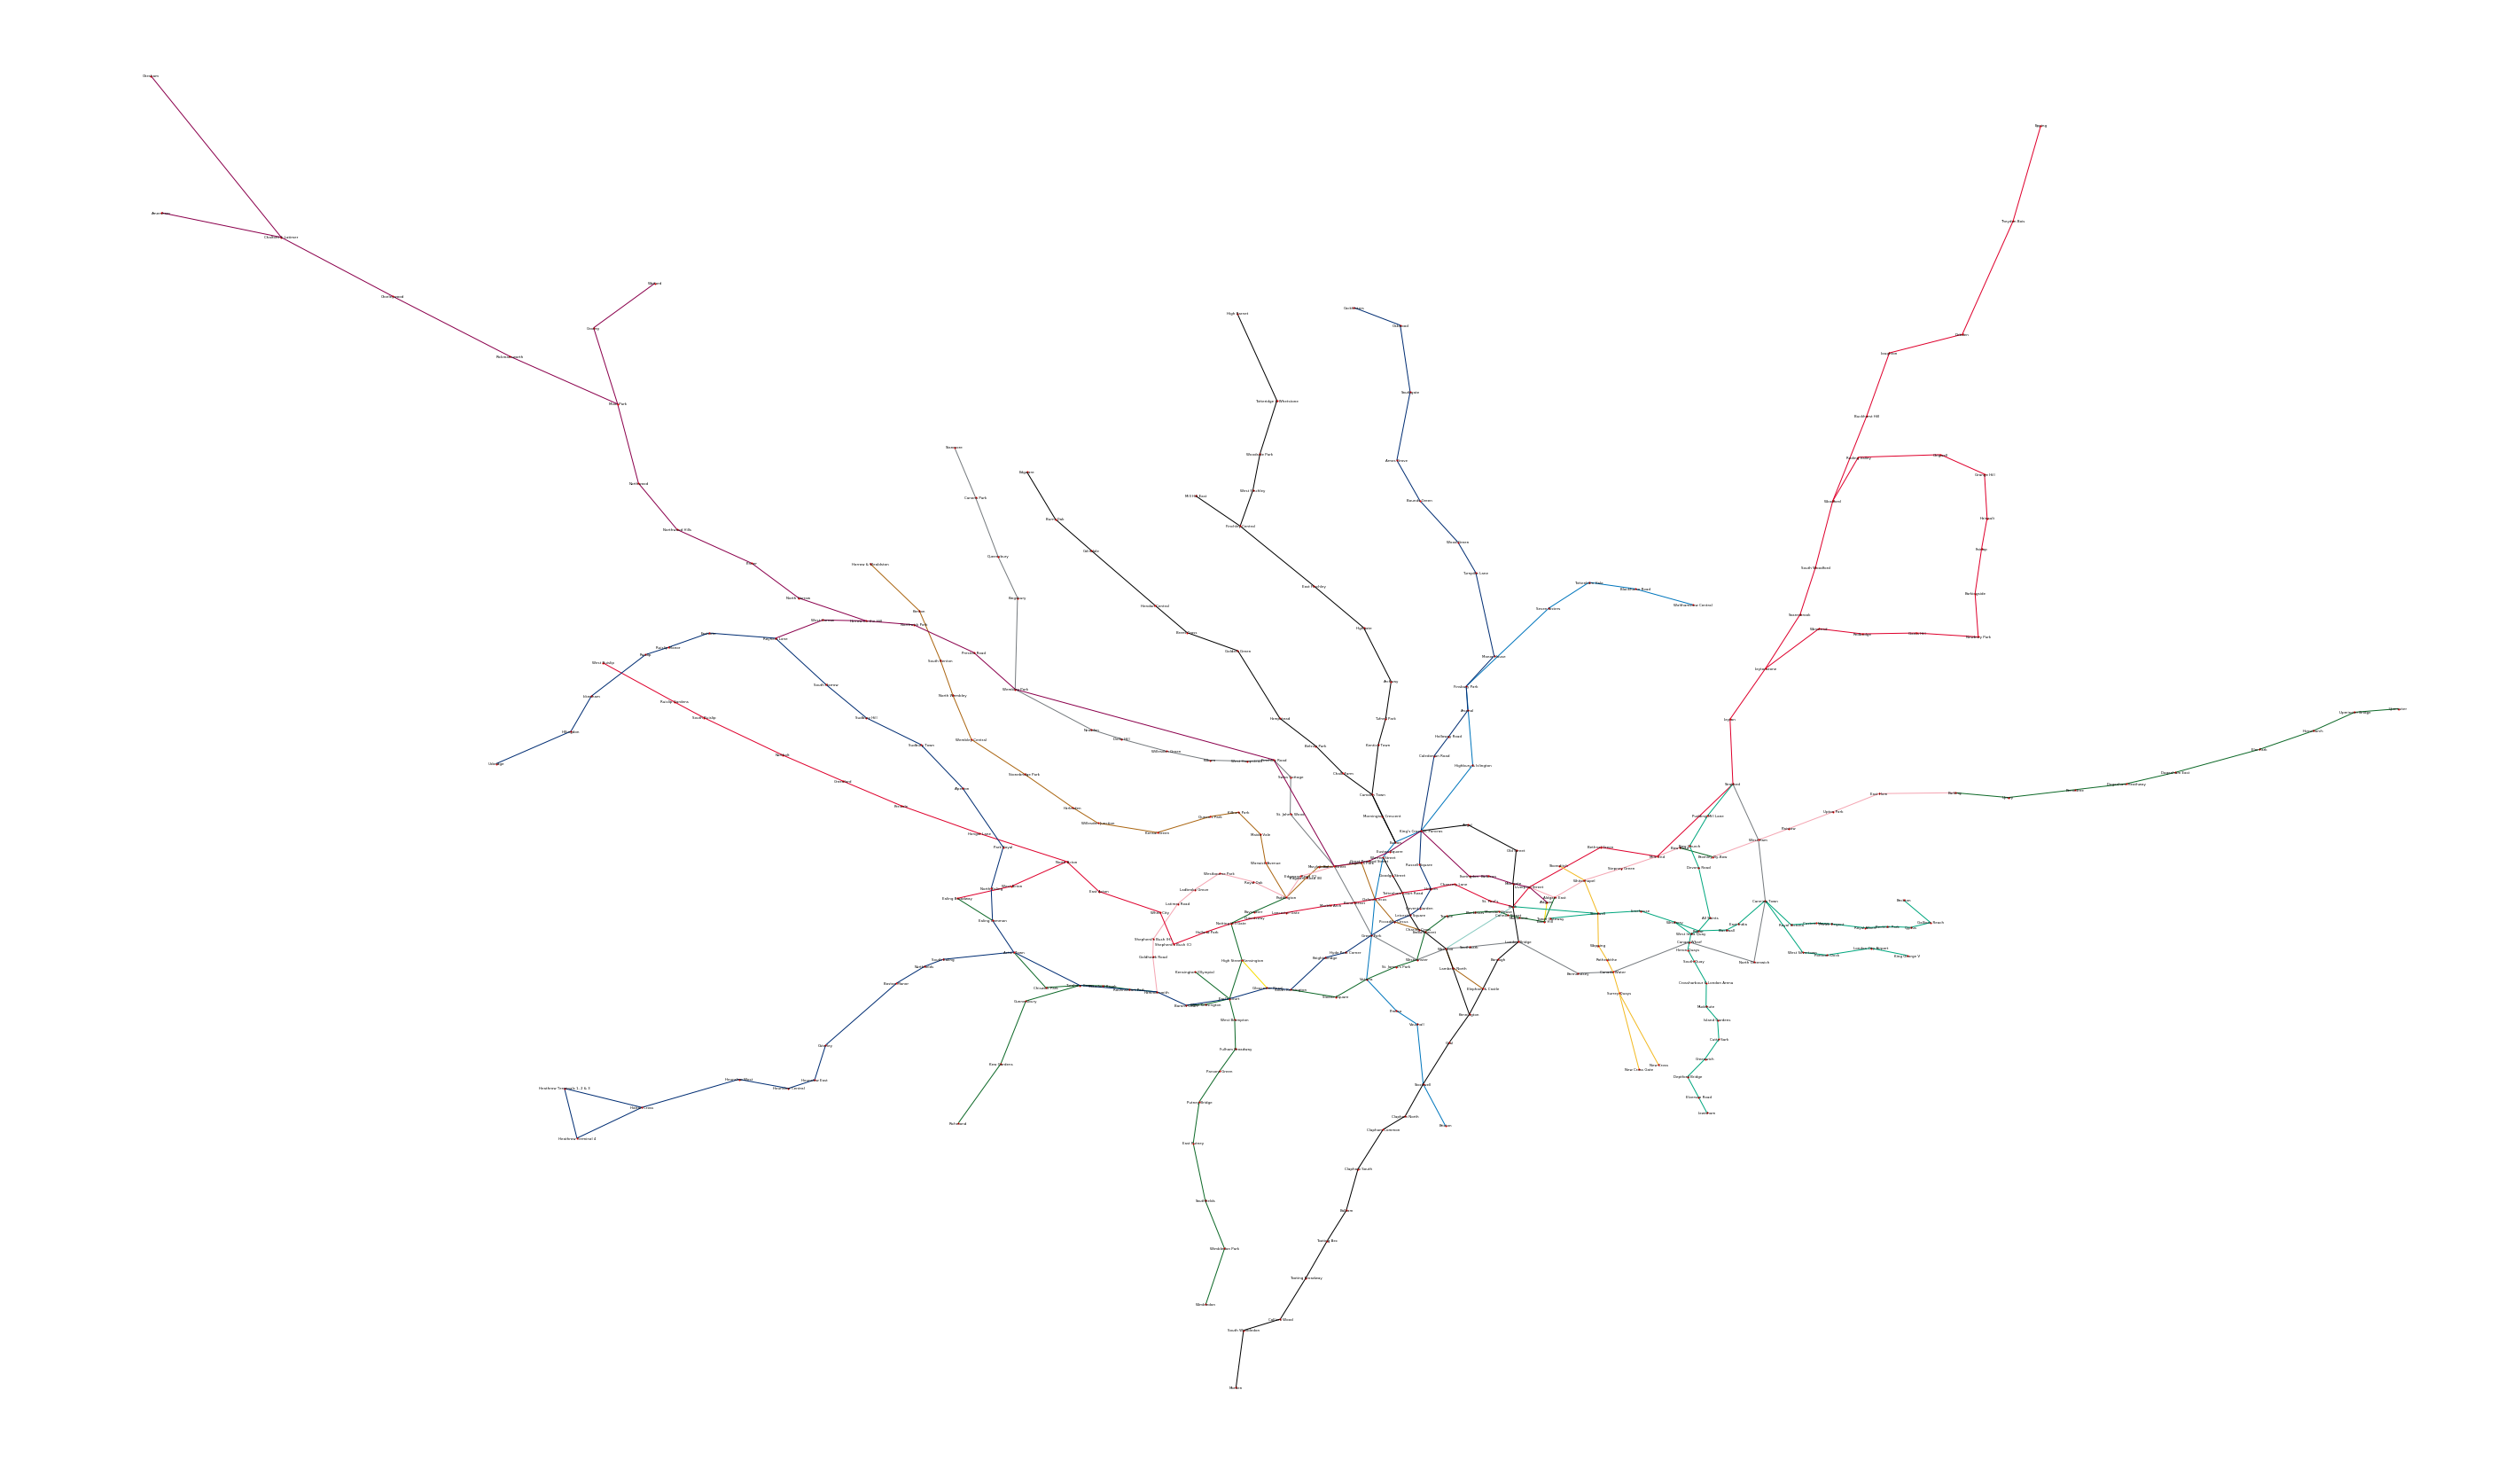

In [9]:
draw_subway_graph(G, lines, figsize=(50,30),show_labels=True)

<div class="alert alert-info">
<center>
  <h1>Contenido</h1>
  </center><p>



<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>1- Dijkstra</p></h2>
  
  <p>
 Se propone que hagáis dos implementaciones del algoritmo <a href="https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm">Dijkstra</a>. 
 <ul><li>
 **dijkstra1:** La primera consiste en el algoritmo común en el que tendremos en cuenta las distancias definidas en los edges. 
 </li><li>
 **dijkstra2:** La segunda implementación es simplemente una ampliación del primer algoritmo en el que añadiremos una penalización por cambio de linea.</li>
 </ul>
</p>
<h3> Ejemplo _dijkstra2_</h3>
<p>
Para ilustrar lo que se pide en la práctica veamos como se calcularía el valor de **C** y **D** en el siguiente gráfico:
</p>


<p><center><img src='img/e1.png'></img></center></p>


<p>
<ul><li>
**[C]** Calculamos V(B) como V(A) + d([A,B]), calculamos V(C) como V(B) + d([B,C]), ya hemos acabado.
</li>
<li>
**[D]** Calculamos V(B) como V(A) + d([A,B]), calculamos V(D) como V(B) + d([B,D]), como [A,B] es linea azul y [B,D] es linea verde, añadimos una penalización por el transbordo a la que llamamos **P**. Por lo tanto, al final obtenemos que V(D) = V(B) + d([B,C]) + P
</li>
</ul>

<br>
-**V(X)**: Valor de X
<br>
-**d([X,Y])**: Distancia de X a Y
<br>
-**P**: Penalización por transbordo

</p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta práctica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto de tipo `Graph` como el que habéis implementado en la Práctica 0.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso, como indexamos los nodos con el identificador de las paradas de Metro, deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El indice del nodo al que queremos llegar.</li>
<li>__infinity=*(int)*__: Parametro opcional en el que definimos que numero nos va bien para utilizar como infinito en el momento de inicializar los pesos de los nodos.</li>
<li>__penalty=*(int)*__: (_Solo necesario para dijkstra2)_ Es un numero entero que corresponde a la penalización que aplicamos al valor de un nodo cuando hay cambio de linea.
</ul>
<br>
<h3>OUTPUT</h3>
El output de la función es un diccionario que contiene los siguientes valores:
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El numero de nodos que se han visitado para encontrar la solución.</li>
<li>__ _'distance'_ __: La distancia del camino mínimo desde el origen hasta el destino (es decir, el valor del nodo destino).
<ul>

</p>
</div>


In [3]:
def dijkstra(G, origen, destino, infinity=float('inf')):
    
    #Creo un diccionari que contindra la distancia a cada vertex de la forma {vertex : distancia}
    dist_dic = {}
    
    #Creo un diccionari que contindra el pare de cada vertex de la forma {vertex : pare}
    parent = {}
    
    #Creo una llista per saber si ja hem visitat un vertex
    visited = []
    
    #Anem a establir cada pare com 'None' i cada distancia com 'infinit'
    for node in G.nodes():
        parent[node] = None
        dist_dic[node] = infinity
    
    #Afegim l'origen com a primer node del nostre diccionari
    dist_dic[origen] = 0 #La distancia de l'origen a si mateix es 0
    
    #Utilitzarem un diccionari com a cua de prioritats
    pqueue = {origen : 0}
    
    #A partir d'aqui, iterarem sobre aquesta cua fins que la buidem o fins que trobem el node desti
    while pqueue:
        #Agafem el minim
        current = min(pqueue, key = pqueue.get)
        
        #L'eliminem de la cua ja que un cop visitat no ens interessa
        del pqueue[current]
        
        if current == destino:
            #Creo una llista que sera el cami recorregut
            path = []
            #Afegeixo el desti
            path.append(current)
            
            #Fins que no sigui a l'origen, afegeixo el pare del node actual
            while(current != origen):
                current = parent[current]
                path.append(current)
            
            #Donem la volta a la llista
            path.reverse()
            
            return{
                'path': path,
                'expanded': len(visited)+1,
                'distance': dist_dic[destino]
            }
        
        #Mirem cada vei del node actual
        for neighbor in G.neighbors(current):
            
            #Si no l'hem visitat encara, l'afegim a la llista de visitats
            if neighbor not in visited:
                visited.append(neighbor)
                
            #Guardem la distancia que tindria per aquest cami...
            current_dist = G.edge[current][neighbor]['distance'] + dist_dic[current]

            #i si es mes petita que la que ja tenia assignada, l'actualitzem per la nova
            if(current_dist < dist_dic[neighbor]):
                dist_dic[neighbor] = current_dist
                pqueue[neighbor] = current_dist
                parent[neighbor] = current #Establim el node actual com a pare

In [3]:
dijkstra(G, 10, 235)

{'path': [10,
  128,
  39,
  145,
  90,
  104,
  11,
  94,
  282,
  202,
  178,
  115,
  291,
  210,
  235],
 'expanded': 253,
 'distance': 0.23695432502311264}

In [4]:
from util import graph2nx
import networkx as nx

Gnx = graph2nx(G)

assert nx.dijkstra_path(Gnx,10,235)==dijkstra(G,10,235)['path']
print("Dijkstra works!")

Dijkstra works!


In [5]:
def dijkstra2(G, origen, destino, penalty=5000000, infinity=float('inf')):
    
    #Creo un diccionari que contindra la distancia a cada vertex de la forma {vertex : distancia}
    dist_dic = {}
    
    #Creo un diccionari que contindra el pare de cada vertex de la forma {vertex : pare}
    parent = {}
    
    #Creo una llista per saber si ja hem visitat un vertex
    visited = []
    
    #Anem a establir cada pare com 'None' i cada distancia com 'infinit'
    for node in G.nodes():
        parent[node] = None
        dist_dic[node] = infinity
    
    #Afegim l'origen com a primer node del nostre diccionari
    dist_dic[origen] = 0 #La distancia de l'origen a si mateix es 0
    
    #Utilitzarem un diccionari com a cua de prioritats
    pqueue = {origen : 0}
    
    #A partir d'aqui, iterarem sobre aquesta cua fins que la buidem o fins que trobem el node desti
    while pqueue:
        #Agafem el minim
        current = min(pqueue, key = pqueue.get)
        
        #L'eliminem de la cua ja que un cop visitat no ens interessa
        del pqueue[current]
        
        if current == destino:
            #Creo una llista que sera el cami recorregut
            path = []
            #Afegeixo el desti
            path.append(current)
            
            #Fins que no sigui a l'origen, afegeixo el pare del node actual
            while(current != origen):
                current = parent[current]
                path.append(current)
            
            #Donem la volta a la llista
            path.reverse()
            
            return{
                'path': path,
                'expanded': len(visited)+1,
                'distance': dist_dic[destino]
            }
        
        #Mirem cada vei del node actual
        for neighbor in G.neighbors(current):
            
            #Si no l'hem visitat encara, l'afegim a la llista de visitats
            if neighbor not in visited:
                visited.append(neighbor)
            
            #Guardem la distancia que tindria per aquest cami...
            if(current != origen):
                if(G.edge[parent[current]][current]['name'] != G.edge[current][neighbor]['name']):
                    current_dist = penalty
                else:
                    current_dist = G.edge[current][neighbor]['distance'] + dist_dic[current]
            else:
                current_dist = G.edge[current][neighbor]['distance'] + dist_dic[current]
            
            #i si es mes petita que la que ja tenia assignada, l'actualitzem per la nova
            if(current_dist < dist_dic[neighbor]):
                dist_dic[neighbor] = current_dist
                pqueue[neighbor] = current_dist
                parent[neighbor] = current #Establim el node actual com a pare

In [7]:
dijkstra2(G, 10, 235)

{'path': [10,
  128,
  39,
  145,
  223,
  126,
  60,
  151,
  197,
  107,
  133,
  146,
  236,
  99,
  74,
  17,
  110,
  265,
  1,
  73,
  182,
  194,
  5,
  252,
  251,
  235],
 'expanded': 67,
 'distance': 0.31965802039051316}

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios Dijkstra</h3></p> </center> </div>

### _(En esta sección se os propone explicar como habeis realizado la implementación y cual es la complejidad detallada del algoritmo. Podéis contestar en este mismo bloque)_

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios Dijkstra2</h3></p> </center> </div>

### _(En esta sección se os propone explicar como habeis realizado la implementación y cual es la complejidad detallada del algoritmo. Podéis contestar en este mismo bloque)_

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>2- Matriz de distancias</p></h2>
   <p>
 Se propone el desarrollo de un algoritmo que dado un grafo construya una matriz de $V \times V$ (donde $V$ es el número de vértices del grafo) que contenga la distancia mínima de cada vértice al resto. 
</p>

<p></p>

<p>
<b> Nota: </b> Recordad que en Algorítmica Avanzada buscamos la implementación de algoritmos que no solo resuelvan el problema, sino que lo hagan de manera eficiente
</p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta práctica la red de metro) sobre el que calcularemos la matriz de distancias. Debe de ser un objeto de tipo `Graph` como el que habéis implementado en la Práctica 0.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>El output de la función es un diccionario cuya clave es un nodo (origen) y el valor es otro diccionario con la forma $\{nodo\_destino: distancia\}$.</li>
    </ul>

</p>
</div>


In [18]:
def dist_mat(G):
    
    # No fer servir dijkstra, sino que fer alguna mena de cosa recursiva fent servir nomes distancies
    # entre nodes i fent servir l'anterior per no refer calculs.
    
    # nar fent veins de veins de veins i actualitzar el dicc amb la distancia
    
    
    '''# necessito mirar un node, tots els seus veïns i nar setejant la dist segons veins i veins+actual i etc etc etc
    dicc = {}
    dicc_test = {}
    
    for nodei in G.nodes():
        for nodej in G.nodes():
            dicc.setdefault(nodei,{})[nodej] = dijkstra(G, nodei, nodej)['distance']
    node = G.nodes()[0]
    
    for node in G.nodes():
        for n in G.neighbors(node):
            dicc.setdefault(node,{})[n] = G.edge[node][n]['distance']
            dicc.setdefault(n,{})[node] = G.edge[node][n]['distance']
    '''
    dicc = {}
    
    for node in G.nodes():
        dicc[node] = {node : 0}
    
    for edge in G.edges():
        dicc.setdefault(edge[0],{})[edge[1]] = G.edge[edge[0]][edge[1]]['distance']
        
    for k in range(1,len(G.nodes())):
        for i in range(1,len(G.nodes())):
            for j in range(1,len(G.nodes())):
                if dicc[i][j] > dicc[i][k] + dicc[k][j]:
                    dicc[i][j] = dicc[i][k] + dicc[k][j]
    
    return dicc

In [19]:
dist_mat(G)

KeyError: 2

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios Matriz de Distancias</h3></p> </center> </div>

### _(En esta sección se os propone explicar como habeis realizado la implementación y cual es la complejidad detallada del algoritmo. Podéis contestar en este mismo bloque)_

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica se podrá realizar en el campus virtual hasta el día __21 de Octubre a las 23:55__. En la tarea que se habilitará en el campus deberéis colgar __el archivo .ipynb__ asi como __el fichero .pyc con vuestra clase grafo__ con los nombres:
</p>
<p>
```
* AA_P1_<apellido1>_<apellido2>_<nombre>.ipynb
* graphs.pyc
```

</p>
<p>
Por ejemplo:
</p>
<p>
```
AA_P1_Doe_Ritchie_John.ipynb
```

</p>
<p>

Es fundamental que el código esté bién comentado y con un análisis de complejidad exhaustivo del algoritmo.
</p>
</div>